# Customer Grouping

### Loading the data...

In [1]:
import pandas as pd
'''Loading the Data... '''
customerData = pd.read_csv("/Users/swathipathaikara/Desktop/DCSI/MachineLearning/CustomerData.csv",sep="\t")
print("Total Number of Recorded Customers: ",len(customerData))
customerData.head()

Total Number of Recorded Customers:  2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
'''Features and Datatype Details...'''
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Cleansing

In [3]:
'''Number of null values in the dataset...'''
customerData.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
'''Income is unknown 24 customers. Since income can't be set to any random default number, 
and the count is low comparing to the whole dataset, these records can be dropped'''
customerData = customerData.dropna()
print("Total records after deleting rows with null values: ", len(customerData))

Total records after deleting rows with null values:  2216


In [5]:
'''Renaming columns for clarity and uniformity'''
customerData=customerData.rename(columns={"Education": "education", "Income": "income","Kidhome":"kidsAtHome",
                                    "Teenhome": "teensAtHome", "Recency": "daysFromLastPurchase",
                                    "MntWines":"wines","MntFruits":"fruits","MntMeatProducts":"meat",
                                    "MntFishProducts":"fish","MntSweetProducts":"sweets","MntGoldProds":"gold",
                                    "NumDealsPurchases": "discountPurchases", "NumWebPurchases":"websitePurchases",
                                    "NumCatalogPurchases":"catalogPurchases", "NumStorePurchases":"storePurchases",
                                    "NumWebVisitsMonth":"websiteVisitsLastMonth","Complain":"complain"})

### Creating additional calculated columns

In [6]:
'''deriving Customer Duration in the company from Customer Enrolment date'''
from datetime import date
customerData["Dt_Customer"] = pd.to_datetime(customerData["Dt_Customer"])
duration = []
enrolledDates = []
for i in customerData["Dt_Customer"]:
    i = i.date()
    enrolledDates.append(i)
for i in enrolledDates:
    difference = date.today() - i
    duration.append(difference)

In [7]:
customerData["customerDuration"] = duration
customerData["customerDuration"] = customerData["customerDuration"].dt.days

In [8]:
'''Creating living with column from Marital Status to get adult count in the family'''
customerData["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [9]:
customerData["livingWith"]=customerData["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", 
                                        "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", 
                                        "Single":"Single","Alone":"Single"})

In [10]:
customerData["livingWith"].value_counts()

Partner    1430
Single      786
Name: livingWith, dtype: int64

In [11]:
'''Refining Education details'''
customerData["education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: education, dtype: int64

In [12]:
customerData["education"]=customerData["education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                                             "Graduation":"Graduate", "Master":"Postgraduate", 
                                                             "PhD":"Postgraduate"})

In [13]:
'''Deriving Age groups from year of birth'''
customerData["age"] = date.today().year - customerData["Year_Birth"] 

In [14]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2216 non-null   int64         
 1   Year_Birth              2216 non-null   int64         
 2   education               2216 non-null   object        
 3   Marital_Status          2216 non-null   object        
 4   income                  2216 non-null   float64       
 5   kidsAtHome              2216 non-null   int64         
 6   teensAtHome             2216 non-null   int64         
 7   Dt_Customer             2216 non-null   datetime64[ns]
 8   daysFromLastPurchase    2216 non-null   int64         
 9   wines                   2216 non-null   int64         
 10  fruits                  2216 non-null   int64         
 11  meat                    2216 non-null   int64         
 12  fish                    2216 non-null   int64   

In [15]:
'''Creating few columns for visualization'''
'''Age Group'''
customerData.loc[customerData['age']<18, 'ageGroup'] = 'Minor'
customerData.loc[(customerData['age'] > 18) & (customerData['age'] <= 30), 'ageGroup'] = 'Youth'
customerData.loc[(customerData['age'] > 30) & (customerData['age'] <= 60), 'ageGroup'] = 'Adult'
customerData.loc[customerData['age'] > 60, 'ageGroup'] = 'Senior' 

In [16]:
'''Total Amount Spent'''
customerData["amountSpent"] = customerData["wines"] + customerData["fruits"] 
+ customerData["meat"] + customerData["fish"] + customerData["sweets"]
+  customerData["gold"]

0        88
1         6
2        42
3         5
4        15
       ... 
2235    247
2236      8
2237     24
2238     61
2239     21
Name: gold, Length: 2216, dtype: int64

In [17]:
'''Total children at home'''
customerData["totalChildren"]=customerData["kidsAtHome"]+customerData["teensAtHome"]

In [18]:
'''calculating family size'''
customerData["customerFamilySize"] = (customerData["livingWith"].replace({"Single": 1, "Partner":2}))
customerData["customerFamilySize"] = customerData["customerFamilySize"]+customerData["totalChildren"]

In [19]:
customerData["livingWith"].value_counts()

Partner    1430
Single      786
Name: livingWith, dtype: int64

In [20]:
customerData["customerFamilySize"].value_counts()

3    880
2    757
4    296
1    252
5     31
Name: customerFamilySize, dtype: int64

In [21]:
import numpy as np
customerData["isParent"] = np.where(customerData.totalChildren > 0, 1, 0)

In [22]:
'''Categorizing customers who accepted offers in different stages'''

customerData.loc[(customerData['AcceptedCmp1'] ==1) | (customerData['AcceptedCmp2'] ==1), 'offerAcceptanceLevel'] = 1
customerData.loc[(customerData['AcceptedCmp3'] ==1) | (customerData['AcceptedCmp4'] ==1), 'offerAcceptanceLevel'] = 2
customerData.loc[(customerData['AcceptedCmp5'] ==1) | (customerData['Response'] ==1), 'offerAcceptanceLevel'] = 3
customerData['offerAcceptanceLevel'] = customerData['offerAcceptanceLevel'].fillna(4)

In [23]:
customerData['offerAcceptanceLevel'].value_counts()

4.0    1611
3.0     404
2.0     162
1.0      39
Name: offerAcceptanceLevel, dtype: int64

### Data Visualization

In [27]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2216 non-null   int64         
 1   Year_Birth              2216 non-null   int64         
 2   education               2216 non-null   object        
 3   Marital_Status          2216 non-null   object        
 4   income                  2216 non-null   float64       
 5   kidsAtHome              2216 non-null   int64         
 6   teensAtHome             2216 non-null   int64         
 7   Dt_Customer             2216 non-null   datetime64[ns]
 8   daysFromLastPurchase    2216 non-null   int64         
 9   wines                   2216 non-null   int64         
 10  fruits                  2216 non-null   int64         
 11  meat                    2216 non-null   int64         
 12  fish                    2216 non-null   int64   

In [87]:
'''Picking some data for visualization'''
dataForVisualization = customerData.filter(["income","ageGroup","amountSpent",
                                            "customerFamilySize","isParent","daysFromLastPurchase",
                                            "customerDuration","education","offerAcceptanceLevel"],axis=1)

<Figure size 432x288 with 0 Axes>

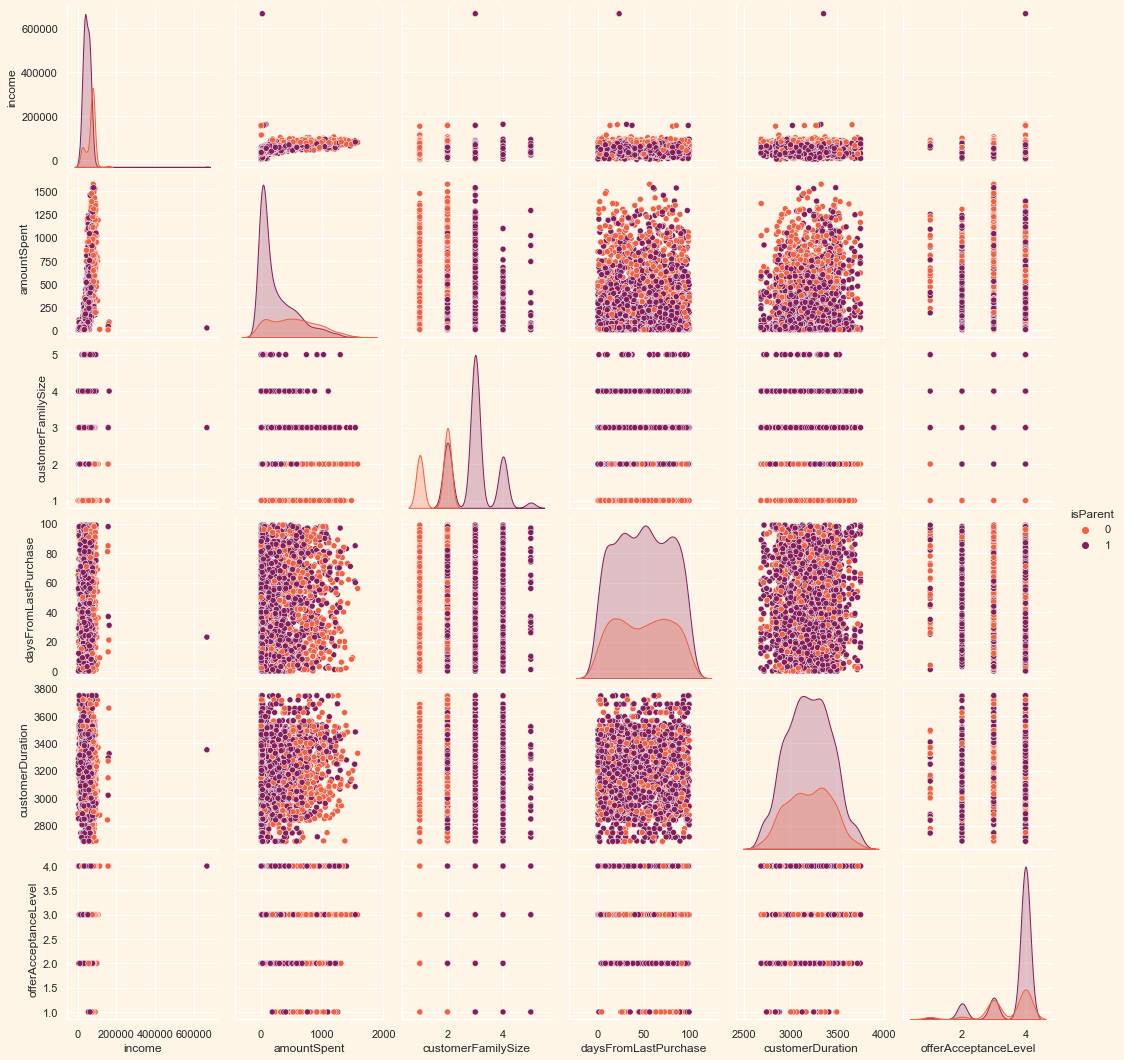

In [26]:
'''Creating a pair plot to get an idea on the relations between all columns'''

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
sns.set(rc={"axes.facecolor":"#FEF5E7","figure.facecolor":"#FEF5E7"})
plt.figure()
sns.pairplot(dataForVisualization, hue= "isParent",palette= ("rocket_r"))
plt.show()

In [53]:
'''Relation between income and amount spent in various age groups'''
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
sns.set(rc={"axes.facecolor":"#FEF5E7","figure.facecolor":"#FEF5E7"})
plt.figure()
plot = sns.relplot(
    data=dataForVisualization,
    x="income", y="amountSpent", col="ageGroup",
    hue="isParent", style="customerFamilySize", size="education", palette="Set2"
)
plot.set(xlim=(0,175000))
plt.show()

NameError: name 'dataForVisualization' is not defined

<Figure size 576x396 with 0 Axes>

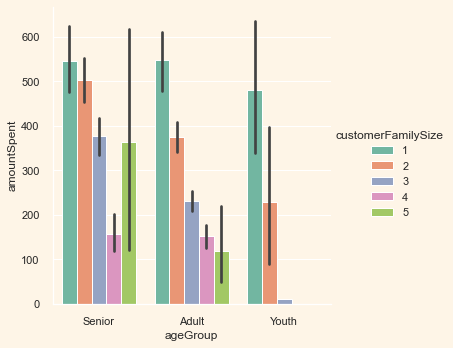

In [89]:
'''A comparison on spent amount according to family size'''
sns.catplot(data=dataForVisualization, kind="bar", x="ageGroup", y="amountSpent", 
            hue="customerFamilySize",palette="Set2")

/Users/swathipathaikara/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/swathipathaikara/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/swathipathaikara/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

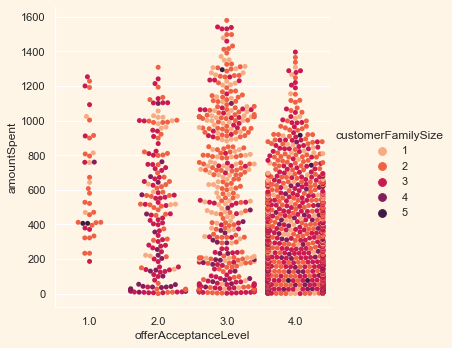

In [32]:

sns.set(rc={"axes.facecolor":"#FEF5E7","figure.facecolor":"#FEF5E7"})
plt.figure()
sns.catplot(
    data=dataForVisualization, kind = "swarm",
    x="offerAcceptanceLevel", y="amountSpent", hue= "customerFamilySize", palette="rocket_r"
)
plt.show()

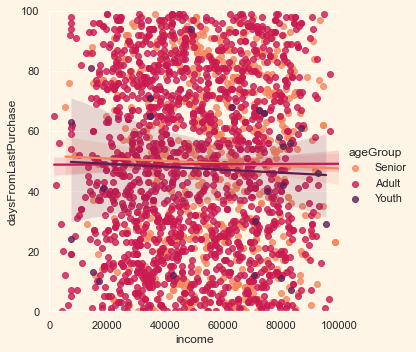

In [33]:
plot = sns.lmplot(data=dataForVisualization, x="income", y="daysFromLastPurchase", hue="ageGroup", palette="rocket_r")
plot.set(xlim=(0,100000))
plot.set(ylim=(0,100))

In [34]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2216 non-null   int64         
 1   Year_Birth              2216 non-null   int64         
 2   education               2216 non-null   object        
 3   Marital_Status          2216 non-null   object        
 4   income                  2216 non-null   float64       
 5   kidsAtHome              2216 non-null   int64         
 6   teensAtHome             2216 non-null   int64         
 7   Dt_Customer             2216 non-null   datetime64[ns]
 8   daysFromLastPurchase    2216 non-null   int64         
 9   wines                   2216 non-null   int64         
 10  fruits                  2216 non-null   int64         
 11  meat                    2216 non-null   int64         
 12  fish                    2216 non-null   int64   

<AxesSubplot:>

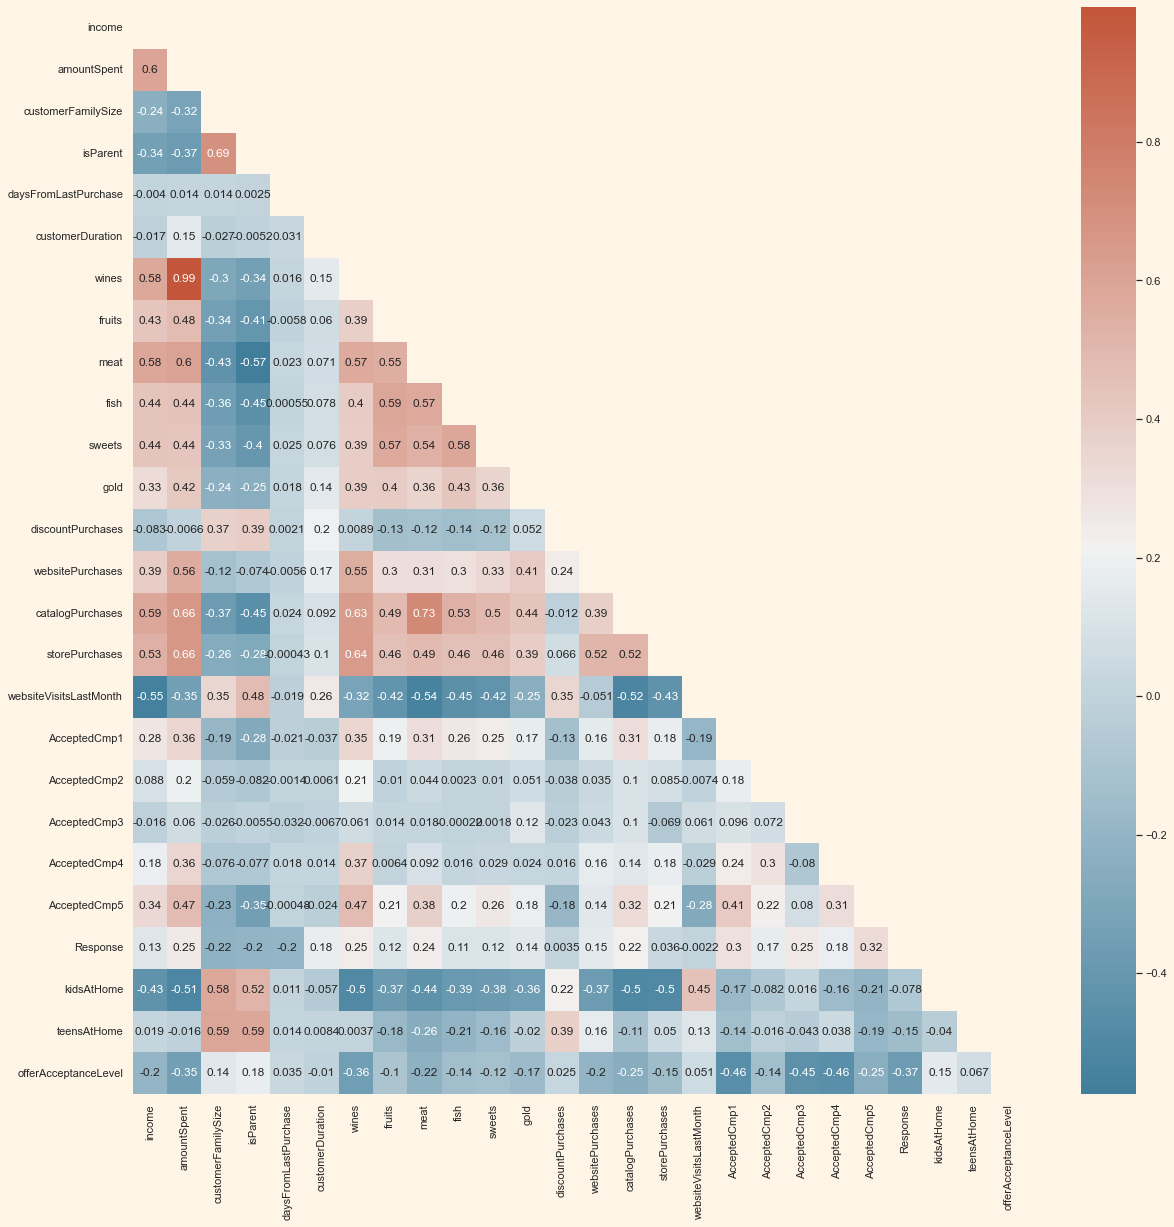

In [35]:
'''Creating a heatmap'''
dataForHeatmap = customerData.filter(["income","ageGroup","amountSpent",
                                      "customerFamilySize","isParent","daysFromLastPurchase",
                                      "customerDuration","education","wines","fruits","meat","fish","sweets",
                                      "gold","discountPurchases","websitePurchases","catalogPurchases",
                                      "storePurchases","websiteVisitsLastMonth","AcceptedCmp1","AcceptedCmp2",
                                      "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response","Complain","livingWith",
                                      "kidsAtHome","teensAtHome","offerAcceptanceLevel"],axis=1)
correlation = dataForHeatmap.corr()
f, ax = plt.subplots(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, annot=True, mask = mask, cmap=cmap)

### Data preprocessing

In [24]:
'''Creating a new dataframe to feed to models'''

dataForClustering = customerData.filter(["age","education","livingWith","income","kidsAtHome","teensAtHome",
                                         "Complain","customerDuration","daysFromLastPurchase","isParent"
                                      "customerFamilySize","wines","fruits","meat","fish","sweets",
                                      "gold","discountPurchases","websitePurchases","catalogPurchases",
                                      "storePurchases","websiteVisitsLastMonth","offerAcceptanceLevel"],axis=1)

In [25]:
'''Encoding the categorial columns to numbers'''
from sklearn.preprocessing import LabelEncoder
categorialSet = (dataForClustering.dtypes == 'object')
objectColumns = list(categorialSet[categorialSet].index)
LEInstance=LabelEncoder()
for i in objectColumns:
    dataForClustering[i]=dataForClustering[[i]].apply(LEInstance.fit_transform)  
print("All columns are now numerical")

All columns are now numerical


In [92]:
dataForClustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2216 non-null   int64  
 1   education               2216 non-null   int64  
 2   livingWith              2216 non-null   int64  
 3   income                  2216 non-null   float64
 4   kidsAtHome              2216 non-null   int64  
 5   teensAtHome             2216 non-null   int64  
 6   customerDuration        2216 non-null   int64  
 7   daysFromLastPurchase    2216 non-null   int64  
 8   wines                   2216 non-null   int64  
 9   fruits                  2216 non-null   int64  
 10  meat                    2216 non-null   int64  
 11  fish                    2216 non-null   int64  
 12  sweets                  2216 non-null   int64  
 13  gold                    2216 non-null   int64  
 14  discountPurchases       2216 non-null   

In [26]:
'''Feature Scaling'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataForClustering)
scaledDataForClustering = pd.DataFrame(scaler.transform(dataForClustering),columns= dataForClustering.columns )
print("All features are now scaled")

All features are now scaled


In [27]:
scaledDataForClustering.head()

,age,education,livingWith,income,kidsAtHome,teensAtHome,customerDuration,daysFromLastPurchase,wines,fruits,meat,fish,sweets,gold,discountPurchases,websitePurchases,catalogPurchases,storePurchases,websiteVisitsLastMonth,offerAcceptanceLevel
0,0.986443,-0.894187,1.348829,0.234063,-0.823039,-0.928972,1.974875,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.885896
1,1.236801,-0.894187,1.348829,-0.234559,1.039938,0.909066,-1.665141,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0.546012
2,0.318822,-0.894187,-0.741384,0.769478,-0.823039,-0.928972,-0.172132,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.546012
3,-1.266777,-0.894187,-0.741384,-1.017239,1.039938,-0.928972,-1.923298,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0.546012
4,-1.016420,0.569268,-0.741384,0.240221,1.039938,-0.928972,-0.821827,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0.546012


## Implementing KMeans

### Optimum number of clusters decided with: 
### 1. Elbow Method
### 2. Silhouette Method 
### 3. Calinski Harabasz Methods
### 4. Davies Bouldin Method

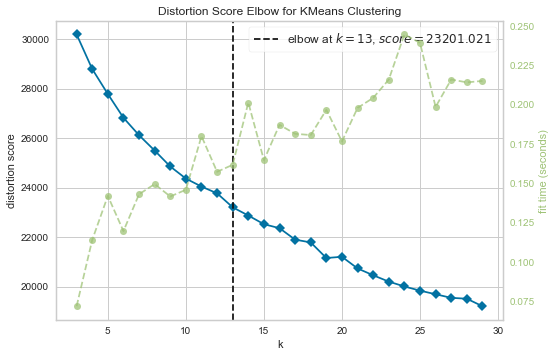

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
visualizer = KElbowVisualizer(model, k=(3,30), timings= True)
visualizer.fit(scaledDataForClustering)
visualizer.show()

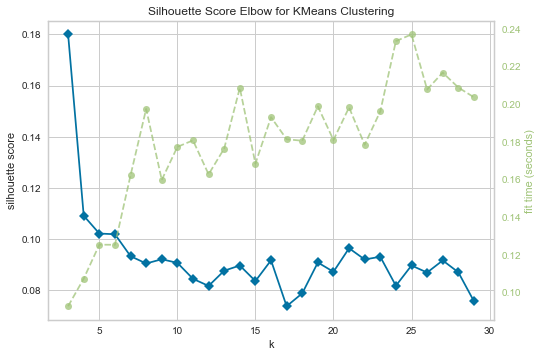

Optimal number of clusters based on silhouette score: [3]


In [29]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
visualizer = KElbowVisualizer(model, k=(3,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(scaledDataForClustering)
visualizer.show()
df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

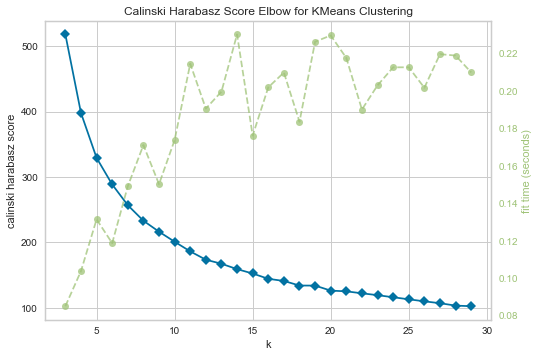

Optimal number of clusters based on calinski_harabasz: [3]


In [30]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
visualizer = KElbowVisualizer(model, k=(3,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(scaledDataForClustering)
visualizer.show()
df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski_harabasz:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [3]


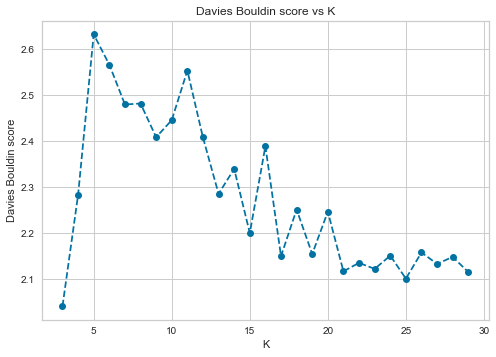

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score 
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center,random_state =10)
    model = kmeans.fit_predict(scaledDataForClustering)
    score = davies_bouldin_score(scaledDataForClustering, model)   
    return score

scores = []
centers = list(range(3,30))
for center in centers:
    scores.append(get_kmeans_score(scaledDataForClustering, center))    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs K');
df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

### Implementing KMeans()

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

km = KMeans(n_clusters=3)
kmcl = km.fit_predict(scaledDataForClustering)
scaledDataForClustering["ClustersKMeans"] = kmcl
customerData["ClustersKMeans"] = kmcl

score_kemans_s = silhouette_score(scaledDataForClustering, kmcl, metric='euclidean')
score_kemans_c = calinski_harabasz_score(scaledDataForClustering, kmcl)
score_kemans_d = davies_bouldin_score(scaledDataForClustering, kmcl)


print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.1919
Calinski Harabasz Score: 573.5488
Davies Bouldin Score: 1.9687


/Users/swathipathaikara/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


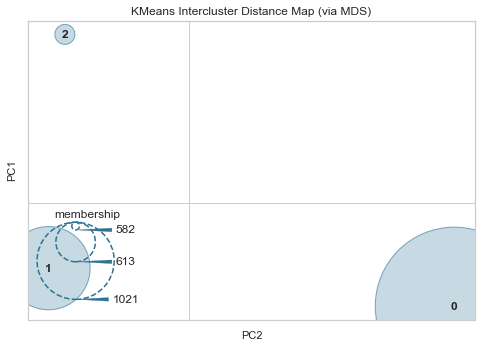

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [34]:
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(km)
visualizer.fit(scaledDataForClustering) 
visualizer.show() 

## Implementing KMedoid ( metric = euclidean )

In [35]:
from sklearn_extra.cluster import KMedoids
kme = KMedoids(metric="euclidean", n_clusters=3)
kmecl = kme.fit_predict(scaledDataForClustering)       
scaledDataForClustering["ClustersKMedoid"] = kmecl
customerData["ClustersKMedoid"] = kmecl

In [36]:
score_kmeds_s = silhouette_score(scaledDataForClustering, kmecl, metric='euclidean')
score_kmeds_c = calinski_harabasz_score(scaledDataForClustering, kmecl)
score_kmeds_d = davies_bouldin_score(scaledDataForClustering, kmecl)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.1919
Calinski Harabasz Score: 573.5488
Davies Bouldin Score: 1.9687


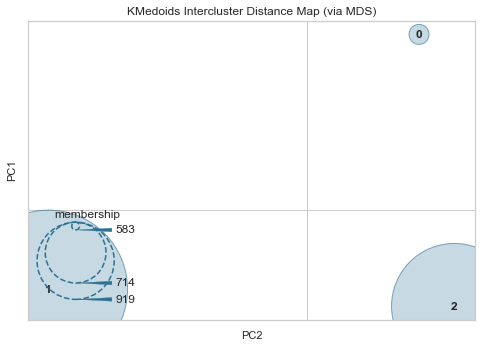

<AxesSubplot:title={'center':'KMedoids Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [37]:
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(kme)
visualizer.fit(scaledDataForClustering) 
visualizer.show() 

### Deciding number of clusters for DBSCAN

### Deciding eps: NearestNeighbors Method

### Deciding Minimum Samples: 
### 1. Silhouette Method
### 2. Calinski Harabasz Method
### 3. Davies Bouldin Method

4.175856446657795


<Figure size 360x360 with 0 Axes>

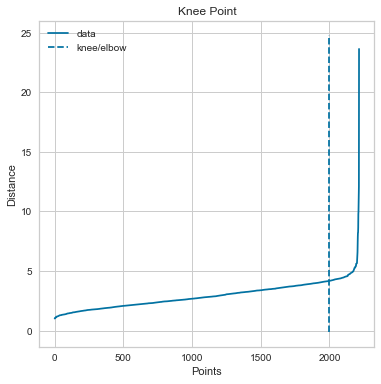

In [38]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(scaledDataForClustering)
distances, indices = neighbors.kneighbors(scaledDataForClustering)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [198]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


Optimal number of min_samples based on silhouette score: [5]


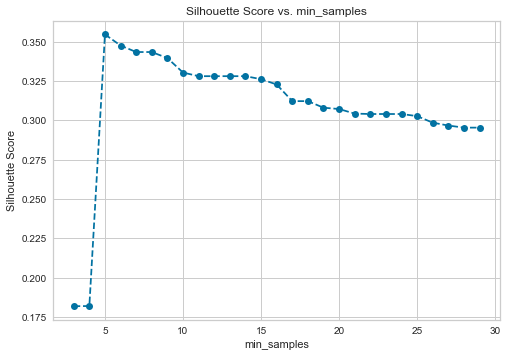

In [39]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    dbscan = DBSCAN(eps= 4.175856446657795, min_samples=center)
    model = dbscan.fit(scaledDataForClustering)
    score = silhouette_score(scaledDataForClustering, model.labels_, metric='euclidean')   
    return score

scores = []
centers = list(range(3,30))

for center in centers:
    scores.append(get_dbscan_score(scaledDataForClustering, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [28, 29]


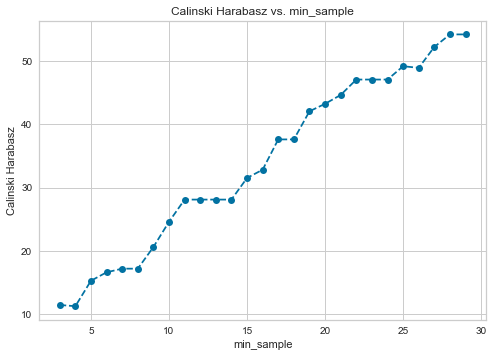

In [40]:
from sklearn.metrics import calinski_harabasz_score  
def get_dbscan_score(data, center):
    dbscan = DBSCAN(eps= 4.175856446657795, min_samples=center)
    model = dbscan.fit(scaledDataForClustering)
    score = calinski_harabasz_score(scaledDataForClustering, dbscan.labels_)   
    return score

scores = []
centers = list(range(3,30))

for center in centers:
    scores.append(get_dbscan_score(scaledDataForClustering, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

Optimal number of min_samples based on Davies Bouldin score: [3]


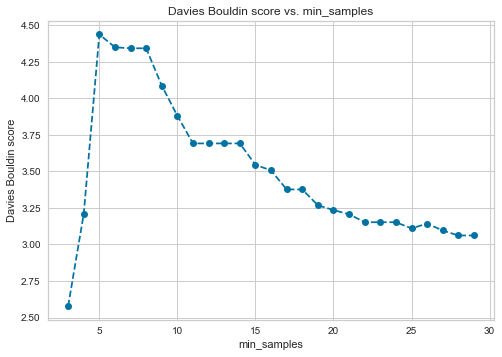

In [41]:
from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):
    dbscan = DBSCAN(eps=4.175856446657795, min_samples=center)
    model = dbscan.fit_predict(scaledDataForClustering)
    score = davies_bouldin_score(scaledDataForClustering, model)
    return score

scores = []
centers = list(range(3,30))

for center in centers:
    scores.append(get_dbscan_score(scaledDataForClustering, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on Davies Bouldin score:', df4['min_samples'].tolist())

In [43]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

dbscan = DBSCAN(eps = 4.175856446657795, min_samples = 5).fit_predict(scaledDataForClustering) # fitting the model
scaledDataForClustering["ClustersDBSCAN"] = dbscan
customerData["ClustersDBSCAN"] = dbscan

score_dbsacn_s = silhouette_score(scaledDataForClustering, dbscan, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(scaledDataForClustering, dbscan)
score_dbsacn_d = davies_bouldin_score(scaledDataForClustering, dbscan)

print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.3585
Calinski Harabasz Score: 17.2256
Davies Bouldin Score: 4.1776


In [44]:
scaledDataForClustering["ClustersDBSCAN"].value_counts()

 0    2174
-1      42
Name: ClustersDBSCAN, dtype: int64

### Hierarchical Clustering - Agglomerative Clustering

### Optimum number of clusters decided with: 
### 1. Elbow Method
### 2. Silhouette Method 
### 3. Calinski Harabasz Methods
### 4. Davies Bouldin Method
### 5. Dendrogram

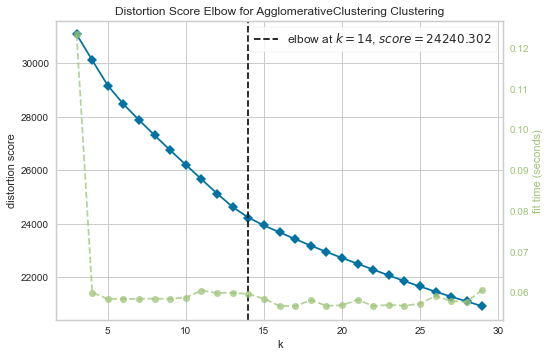

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,30), timings= True)
visualizer.fit(scaledDataForClustering)
visualizer.show() 

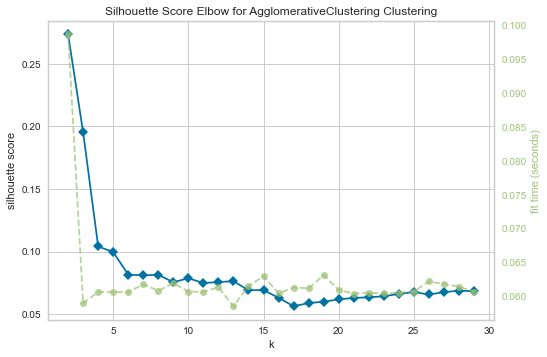

Optimal number of clusters based on silhouette score: [2]


In [46]:
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(scaledDataForClustering)
visualizer.show()
df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

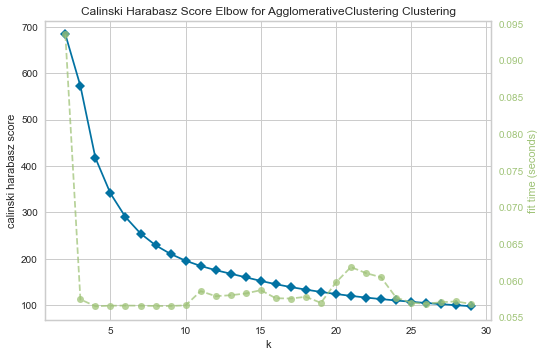

Optimal number of clusters based on calinski_harabasz score: [2]


In [47]:
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(scaledDataForClustering)
visualizer.show()
df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski_harabasz score:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [2]


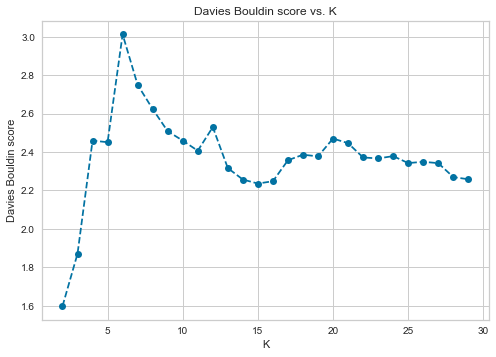

In [48]:
from sklearn.metrics import davies_bouldin_score 
def get_AG_clustering_score(data, center):
    AG_clustering = AgglomerativeClustering(n_clusters= center)
    model = AG_clustering.fit_predict(scaledDataForClustering)
    score = davies_bouldin_score(scaledDataForClustering, model)   
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_AG_clustering_score(scaledDataForClustering, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

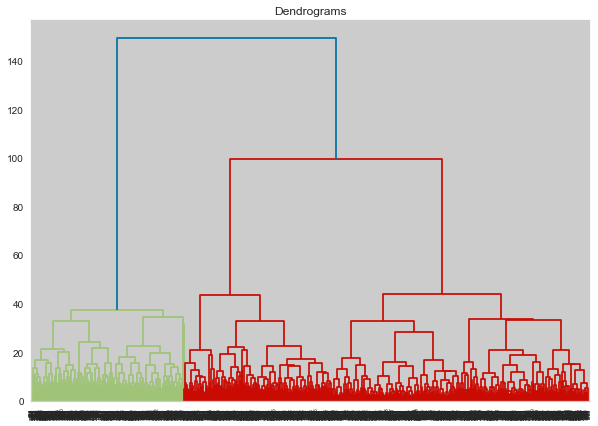

In [49]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaledDataForClustering, method='ward'))

In [51]:
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

AC = AgglomerativeClustering(n_clusters=2)
yhat_AC = AC.fit_predict(scaledDataForClustering)
scaledDataForClustering["ClustersAgglo"] = yhat_AC
customerData["ClustersAgglo"]= yhat_AC

score_AGclustering_s = silhouette_score(scaledDataForClustering, yhat_AC, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(scaledDataForClustering, yhat_AC)
score_AGclustering_d = davies_bouldin_score(scaledDataForClustering, yhat_AC)

print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.2802
Calinski Harabasz Score: 710.3804
Davies Bouldin Score: 1.5662
